# Fashion MNIST

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data
dataset = tf.keras.datasets.fashion_mnist

In [3]:
# Split data into training and testing set
(X_train, y_train), (X_test, y_test) = dataset.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [24]:
X_train[0].shape, y_train.shape, y_test.shape, X_test.shape

((28, 28, 1), (60000,), (10000,), (10000, 28, 28, 1))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

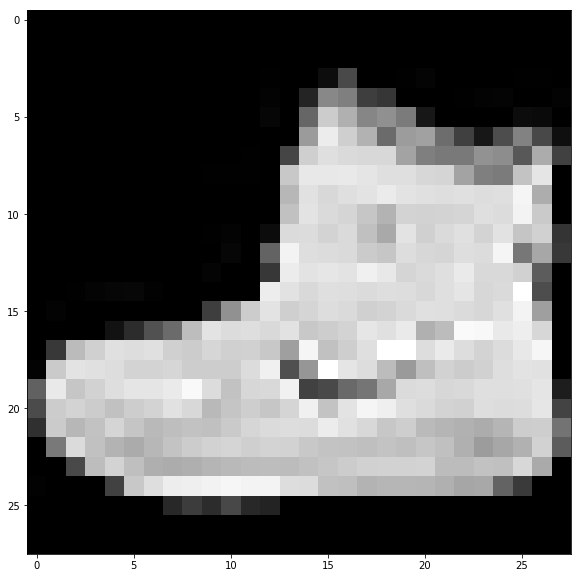

In [38]:
# Visulizing the data 

print(X_train[0].squeeze())

print("\n")

# plt.gray()
plt.subplots(figsize=(28, 10))
plt.grid(False)
plt.imshow(X_train[0].squeeze())
plt.show()

In [7]:
# Reshaping the data 
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
# Normalizing the data
X_train = X_train/255.0
X_test =X_test/255.0

In [14]:
# Callbacks
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached accuracy 99% stopping training\n")
            self.model.stop_training = True

            
callbacks = myCallbacks()

In [10]:
# Building the neural net with two convolutional layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 126)               201726    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [15]:
# Compiling and fittting the neural net
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,
         y_train, 
         epochs=10,
          callbacks=[callbacks]
         )

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 468us/sample - loss: 0.2972 - accuracy: 0.8910
Epoch 2/10
60000/60000 [==============================] - 31s 510us/sample - loss: 0.2471 - accuracy: 0.9082
Epoch 3/10
60000/60000 [==============================] - 32s 529us/sample - loss: 0.2132 - accuracy: 0.9203
Epoch 4/10
60000/60000 [==============================] - 31s 519us/sample - loss: 0.1868 - accuracy: 0.9295
Epoch 5/10
60000/60000 [==============================] - 29s 490us/sample - loss: 0.1638 - accuracy: 0.9380
Epoch 6/10
60000/60000 [==============================] - 31s 519us/sample - loss: 0.1460 - accuracy: 0.9452
Epoch 7/10
60000/60000 [==============================] - 30s 496us/sample - loss: 0.1283 - accuracy: 0.9521
Epoch 8/10
60000/60000 [==============================] - 31s 512us/sample - loss: 0.1136 - accuracy: 0.9570
Epoch 9/10
60000/60000 [==============================] - 32s 525us/sample - loss: 0.0991 - accuracy: 0.9

In [17]:
# Building the neural net with 1 convolutional layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 126)               1362942   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1270      
Total params: 1,364,852
Trainable params: 1,364,852
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compiling and fittting the neural net
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,
         y_train, 
         epochs=10,
          callbacks=[callbacks],
          verbose=True
         )

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 450us/sample - loss: 0.3780 - accuracy: 0.8636
Epoch 2/10
60000/60000 [==============================] - 27s 447us/sample - loss: 0.2555 - accuracy: 0.9074
Epoch 3/10
60000/60000 [==============================] - 27s 445us/sample - loss: 0.2115 - accuracy: 0.9226
Epoch 4/10
60000/60000 [==============================] - 26s 433us/sample - loss: 0.1807 - accuracy: 0.9330
Epoch 5/10
60000/60000 [==============================] - 27s 450us/sample - loss: 0.1536 - accuracy: 0.9429
Epoch 6/10
60000/60000 [==============================] - 29s 490us/sample - loss: 0.1290 - accuracy: 0.9526
Epoch 7/10
60000/60000 [==============================] - 28s 460us/sample - loss: 0.1099 - accuracy: 0.9596
Epoch 8/10
60000/60000 [==============================] - 28s 468us/sample - loss: 0.0928 - accuracy: 0.9660
Epoch 9/10
60000/60000 [==============================] - 26s 436us/sample - loss: 0.0775 - accuracy: 0.9